# Milestone - 1

## Import and preprocess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.simplefilter(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('crimedata.csv',encoding='latin-1',na_values=["?"])
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90

In [3]:
df = df.rename(columns={'Êcommunityname':'communityName'})

## Delete dependent variable

In [4]:
df.drop(columns=['murders' ,'murdPerPop' ,'rapes',
 'rapesPerPop' ,'robberies' ,'robbbPerPop' ,'assaults' ,'assaultPerPop',
 'burglaries' ,'burglPerPop' ,'larcenies' ,'larcPerPop' ,'autoTheft',
 'autoTheftPerPop' ,'arsons' ,'arsonsPerPop' ,'nonViolPerPop'],inplace=True)

* Extra columns added ['OwnOccQrange,RentQrange']

In [5]:
df.drop(columns=['communityName','countyCode' ,'communityCode' ,'fold'],inplace=True)

In [6]:
df.shape

(2215, 126)

In [7]:
list_col = df.columns.values
print(list_col)

['state' 'population' 'householdsize' 'racepctblack' 'racePctWhite'
 'racePctAsian' 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24'
 'agePct65up' 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf'
 'pctWInvInc' 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc'
 'perCapInc' 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap'
 'OtherPerCap' 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov'
 'PctLess9thGrade' 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed'
 'PctEmploy' 'PctEmplManu' 'PctEmplProfServ' 'PctOccupManu'
 'PctOccupMgmtProf' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'TotalPctDiv' 'PersPerFam' 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par'
 'PctTeen2Par' 'PctWorkMomYoungKids' 'PctWorkMom' 'NumKidsBornNeverMar'
 'PctKidsBornNeverMar' 'NumImmig' 'PctImmigRecent' 'PctImmigRec5'
 'PctImmigRec8' 'PctImmigRec10' 'PctRecentImmig' 'PctRecImmig5'
 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell'
 'PctLargHouseFam' 'PctLargHouseOccup' 'PersPerO

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 126 entries, state to ViolentCrimesPerPop
dtypes: float64(98), int64(27), object(1)
memory usage: 2.1+ MB


In [9]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2214.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,343.000000,343.000000,343.000000,343.000000,3.430000e+02,3.430000e+02,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,2215.000000,2215.000000,2215.000000,343.000000,3.430000e+02,343.000000,343.000000,2215.000000,3.430000e+02,1994.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,4.773472e+04,70.465309,33984.696163,78.312758,0.881842,43.750935,26.409418,6.801445,15.969002,39857.055079,15603.524605,16567.698420,11541.749436,12229.191422,14227.989616,9442.765131,11018.998194,7.590853e+03,11.620537,9.186646,22.305120,23.056876,6.045242,62.021612,18.228907,24.532298,13.819165,28.209201,9.127585,30.683517,12.325300,10.812515,3.129698,74.059129,71.227255,81.865422,75.521788,60.542641,68.854795,2141.418962,3.115499,6.277274e+03,13.525693,20.421287,27.544181,34.733928,1.099124,1.697463,2.307503,2.943761,87.074993,2.405792,5.386619,3.915788,2.615842,2.740483,2.367138,66.369454,4.132438,45.405341,2.640632,1748.368849,92.93397

In [10]:
df.describe(include=['O'])

,state
count,2215
unique,48
top,CA
freq,279


# Visualisation

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

####  population vs ViolentCrimesPerPop

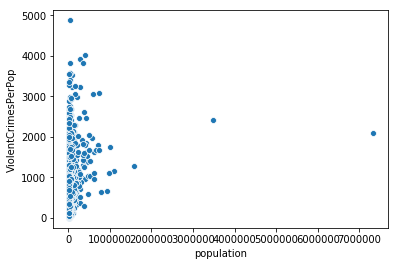

In [12]:
ax = sns.scatterplot(x="population", y="ViolentCrimesPerPop", data=df)
plt.show()

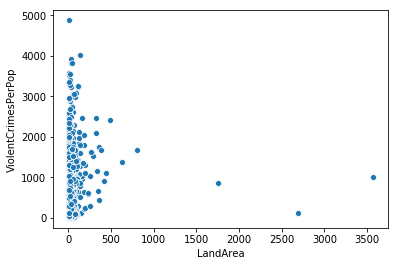

In [13]:
ax = sns.scatterplot(x="LandArea", y="ViolentCrimesPerPop", data=df)
plt.show()

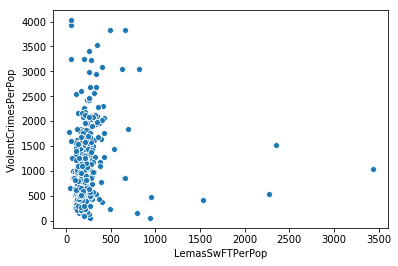

In [14]:
ax = sns.scatterplot(x="LemasSwFTPerPop", y="ViolentCrimesPerPop", data=df)
plt.show()

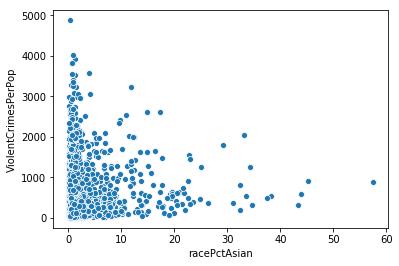

In [15]:
ax = sns.scatterplot(x="racePctAsian", y="ViolentCrimesPerPop", data=df)
plt.show()

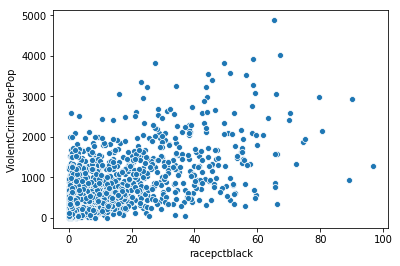

In [16]:
ax = sns.scatterplot(x="racepctblack", y="ViolentCrimesPerPop", data=df)
plt.show()

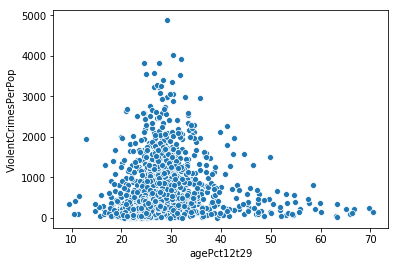

In [17]:
ax = sns.scatterplot(x="agePct12t29", y="ViolentCrimesPerPop", data=df)
plt.show()

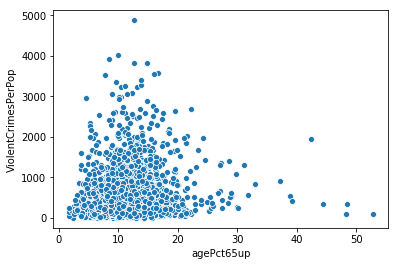

In [18]:
ax = sns.scatterplot(x="agePct65up", y="ViolentCrimesPerPop", data=df)
plt.show()

In [19]:
crimedata_state_violent = df.groupby('state').agg({'ViolentCrimesPerPop':'mean'})[['ViolentCrimesPerPop']].reset_index()

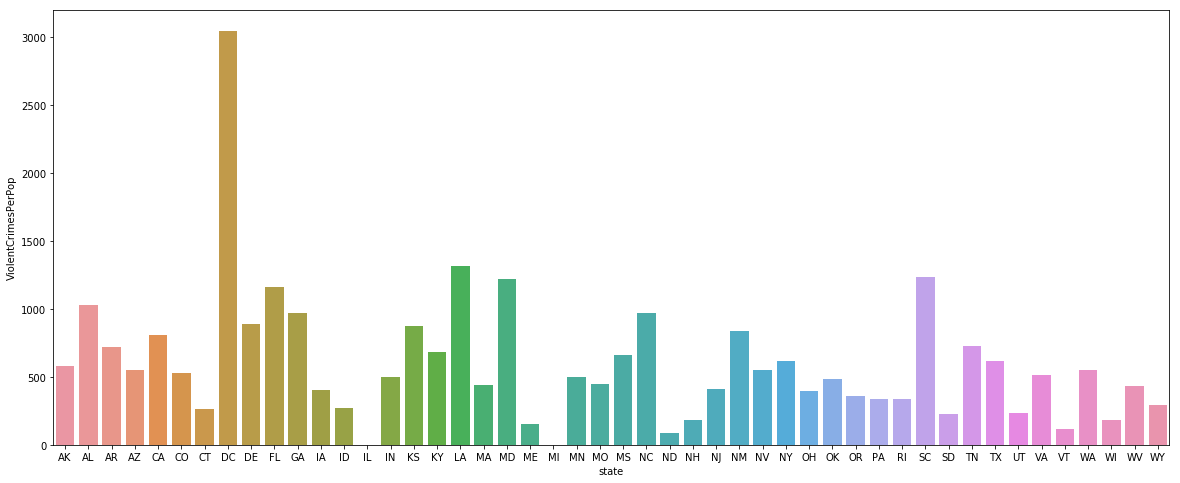

In [20]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="state", y="ViolentCrimesPerPop", data=crimedata_state_violent)
plt.show()

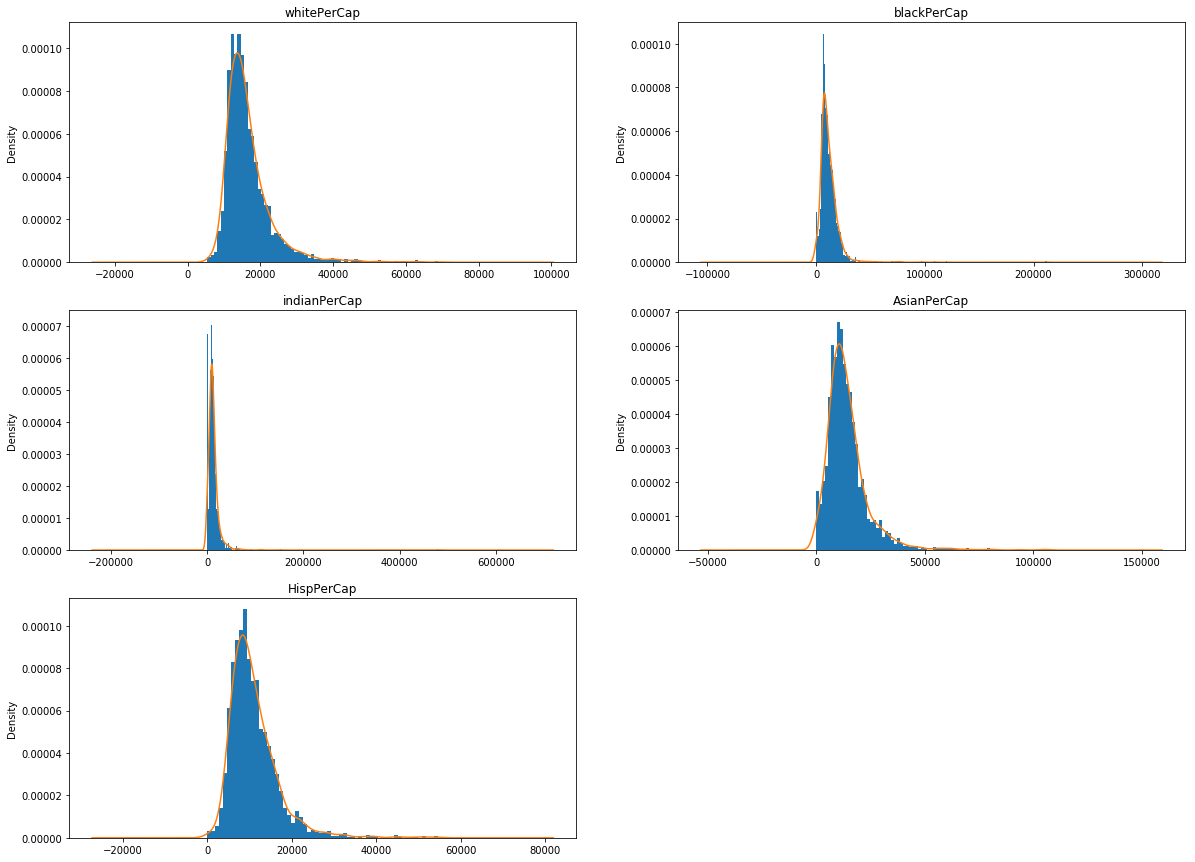

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.title('whitePerCap')
df['whitePerCap'].hist(bins='fd', density=True)
df['whitePerCap'].plot(kind='kde')


plt.subplot(3,2,2)
plt.title('blackPerCap')
df['blackPerCap'].hist(bins='fd', density=True)
df['blackPerCap'].plot(kind='kde')

plt.subplot(3,2,3)
plt.title('indianPerCap')
df['indianPerCap'].hist(bins='fd', density=True)
df['indianPerCap'].plot(kind='kde')



plt.subplot(3,2,4)
plt.title('AsianPerCap')

df['AsianPerCap'].hist(bins='fd', density=True)
df['AsianPerCap'].plot(kind='kde')


plt.subplot(3,2,5)

plt.title('HispPerCap')
df['HispPerCap'].hist(bins='fd', density=True)
df['HispPerCap'].plot(kind='kde')

plt.show()

## Handling Missing value

In [22]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
LemasSwFTFieldPerPop,1872,0.845147
LemasTotalReq,1872,0.845147
PolicReqPerOffic,1872,0.845147
PolicPerPop,1872,0.845147
RacialMatchCommPol,1872,0.845147
PctPolicWhite,1872,0.845147
PctPolicBlack,1872,0.845147
PctPolicHisp,1872,0.845147
PctPolicAsian,1872,0.845147
PctPolicMinor,1872,0.845147


In [23]:
df = df.drop((missing_data[missing_data['Total'] > 500]).index,1)

In [24]:
df.shape

(2215, 104)

In [25]:
df = df.dropna(subset = ['ViolentCrimesPerPop'],axis=0)

In [26]:
# fill missing values for the select columns  with mean value
cols = ['OtherPerCap']
df.fillna(df[cols].mean(),inplace=True)

In [27]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
ViolentCrimesPerPop,0,0.0
LemasPctOfficDrugUn,0,0.0
HispPerCap,0,0.0
NumUnderPov,0,0.0
PctPopUnderPov,0,0.0


In [28]:
df.shape

(1994, 104)

## Convert categorical value to numerical

In [29]:
categorical_features = list(df.select_dtypes(include=['O']).columns)
categorical_features

['state']

In [30]:
# Convert object datatype to categorical

for column in categorical_features:
    df[column] = df[column].astype('category')

In [31]:
# select the categorical columns 
category_columns = df.select_dtypes(['category']).columns

# convert each columns to code
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)
df.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,26,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,41.02
1,33,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,127.56
2,32,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,218.59
3,29,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,306.64
5,21,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,1.00,41.15,29.31,7.12,14.09,27705,11878,12029,7382,10264,10753,7192.0,8104,23223,17.78,8.76,23.03,20.66,5.72,59.02,14.31,26.83,14.72,23.42,11.40,33.32,14.46,13.04,2.89,71.94,69.79,79.76,75.33,62.96,70.52,1511,1.58,2091,21.33,30.56,38.02,45.48,0.32,0.45,0.57,0.68,96.87,0.60,

## Correlation Matrix

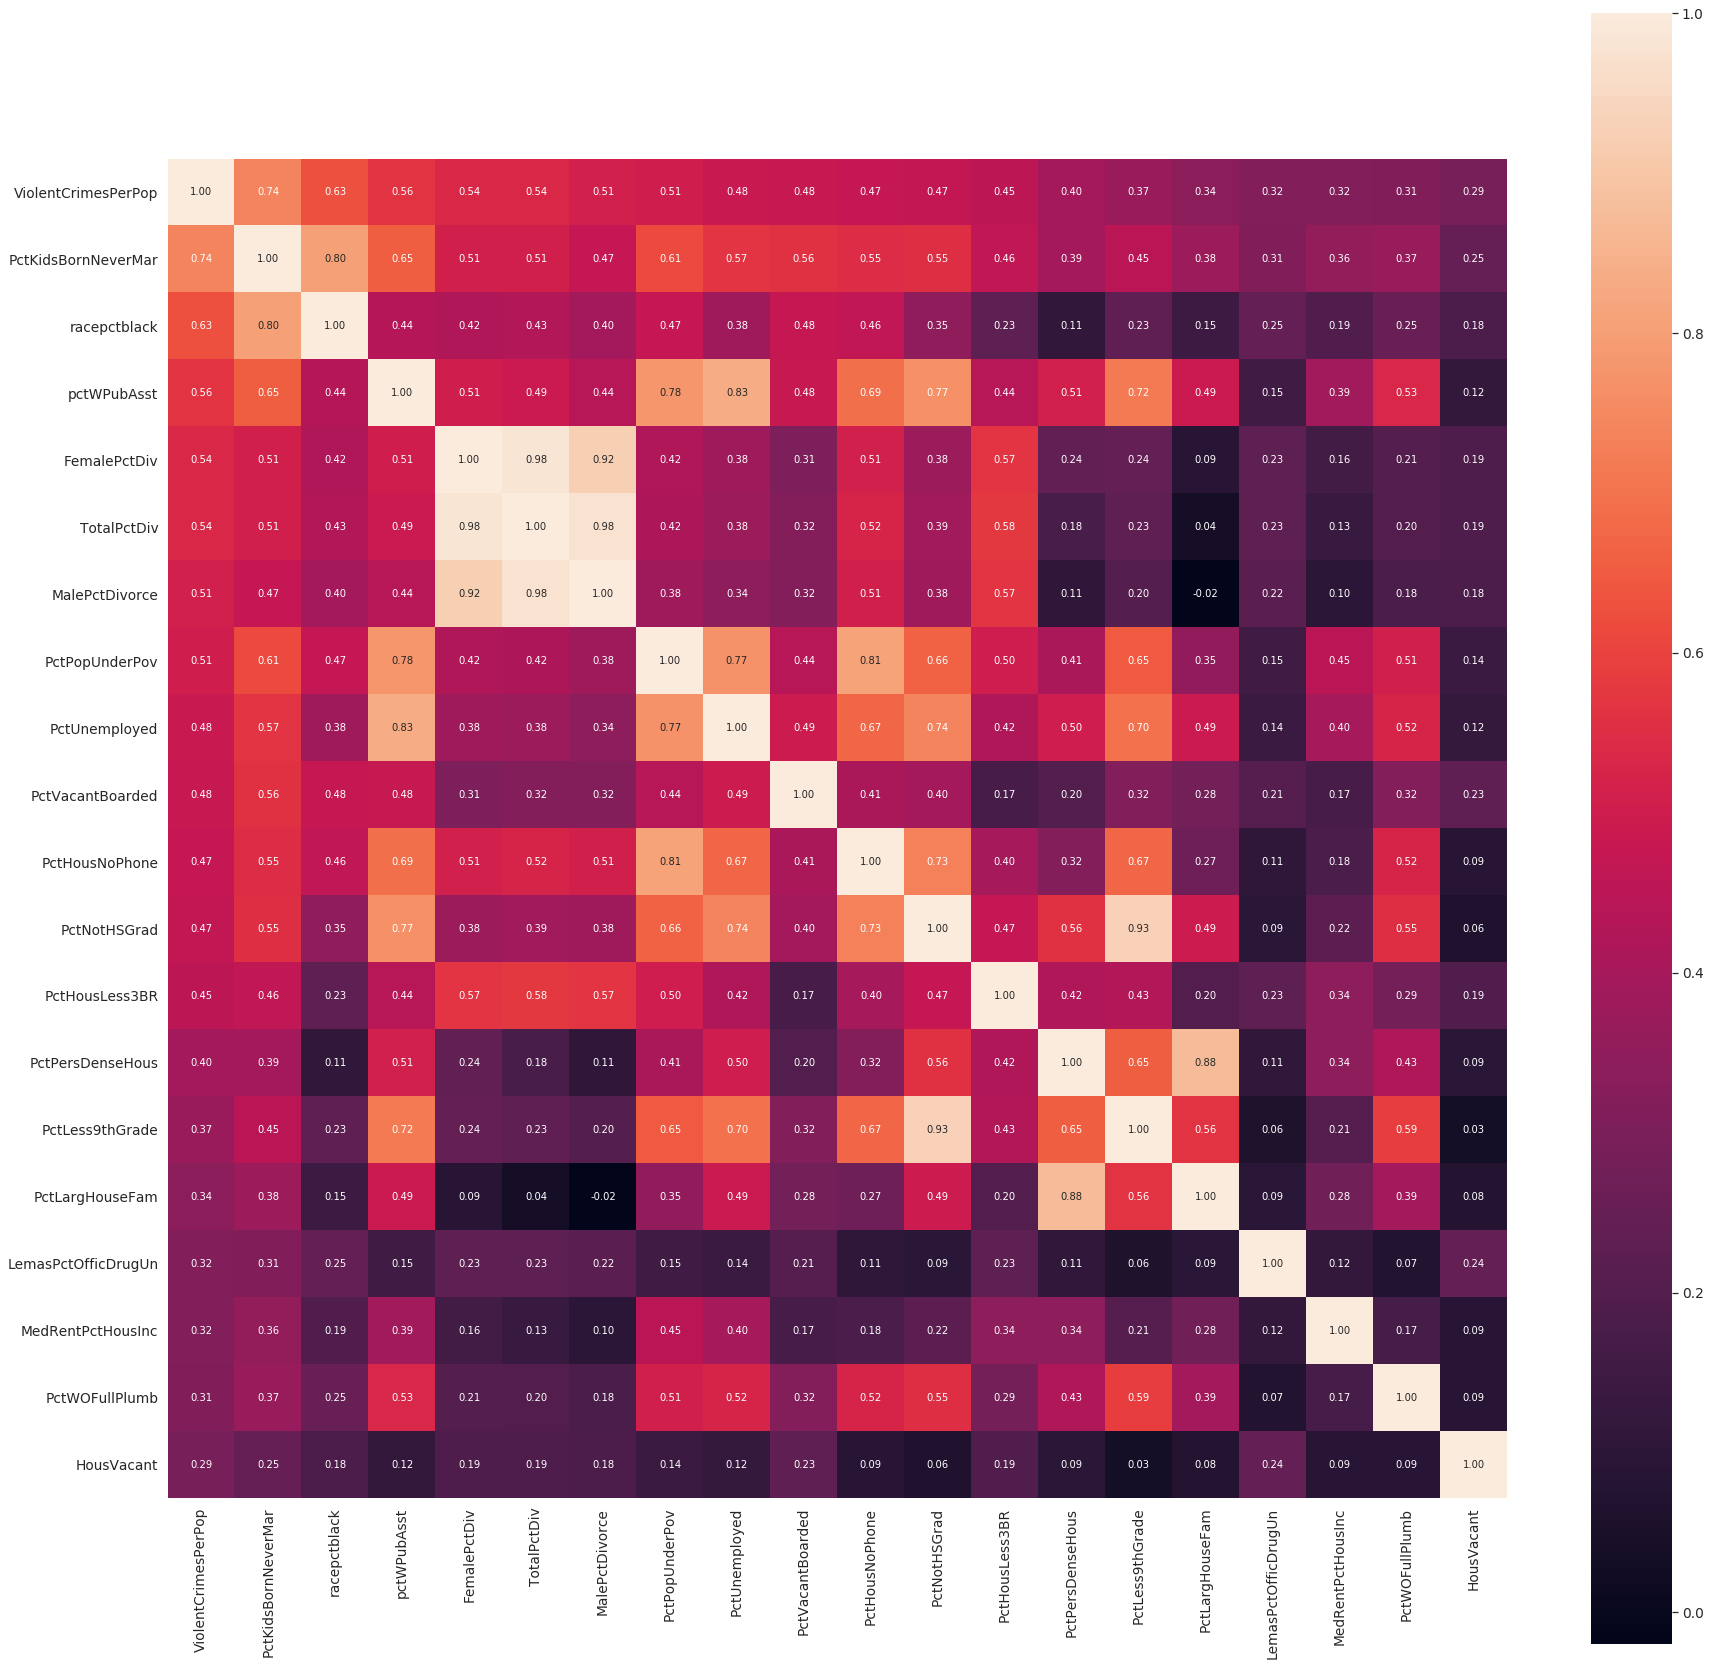

In [32]:
plt.figure(figsize=(30,30))
n = 20
df_corr = df.corr()
columns = df_corr.nlargest(n, 'ViolentCrimesPerPop')['ViolentCrimesPerPop'].index
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

## Modeling

In [33]:
y = df['ViolentCrimesPerPop']
X = df.drop(['ViolentCrimesPerPop'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
numerical_columns = X.drop('state',axis=1).columns.tolist()

In [37]:
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

/home/bat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.685
Model:                             OLS   Adj. R-squared:                  0.664
Method:                  Least Squares   F-statistic:                     32.17
Date:                 Mon, 13 May 2019   Prob (F-statistic):          3.30e-304
Time:                         03:41:38   Log-Likelihood:                -11599.
No. Observations:                 1595   AIC:                         2.340e+04
Df Residuals:                     1493   BIC:                         2.395e+04
Df Model:                          101                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [41]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_lm)

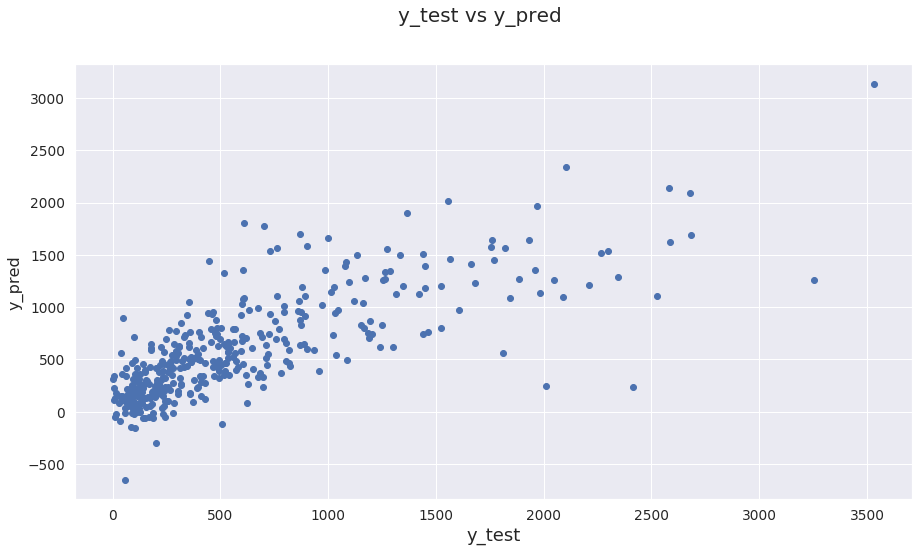

In [42]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [43]:
print("RMSE of test set is {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 score of test set is {}".format(r2_score(y_test, y_pred)))

RMSE of test set is 375.17011348806153
R2 score of test set is 0.5955585167635717


# Feature reduction

### Based on correlation matrix 

In [44]:
corr = df.corr()
corr.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
state,1.000000,-0.029918,-0.049922,-0.054179,0.207033,-0.288945,-0.163117,0.100238,0.048482,0.061861,-0.008085,-0.032551,-0.099737,-0.139357,0.006004,0.089844,0.053167,0.051233,-0.096905,0.011122,-0.127288,-0.151175,-0.185448,-0.097281,-0.036567,-0.063510,-0.083988,-0.086741,-0.009748,0.040667,-0.005464,-0.003254,-0.047110,-0.034766,-0.016770,0.080694,0.078279,0.096208,-0.055305,-0.094256,-0.065502,-0.172726,-0.136072,-0.053491,0.078507,0.104620,0.047056,0.090378,-0.000318,0.039829,-0.013433,-0.109976,-0.047403,-0.059529,-0.095662,-0.102823,-0.104522,-0.290528,-0.301561,-0.311068,-0.309313,0.203121,-0.206453,-0.139777,-0.125855,-0.078051,0.000578,-0.166847,0.077478,-0.241898,-0.156130,0.098061,-0.032012,0.026614,0.039105,0.074035,0.265065,-0.135216,0.101135,0.035710,-0.362619,-0.361667,-0.356159,-0.282015,-0.284938,-0.303545,-0.307146,-0.239283,-0.296125,-0.273433,-0.354721,0.187324,-0.015973,-0.023962,-0.331505,0.322627,0.139254,0.050027,0.111097,-0.060734,-0.108040,-0.014821,-0.055771,-0.202935
population,-0.029918,1.000000,-0.019981,0.119854,-0.169166,0.090208,0.086982,-0.008923,0.046036,0.017482,-0.045355,0.998995,0.114537,-0.049027,-0.007607,-0.064685,-0.079206,-0.058257,0.102717,-0.059051,-0.052909,-0.021724,0.030418,-0.025298,-0.009580,-0.036956,-0.023606,-0.048526,0.988444,0.086877,0.034136,0.045206,-0.003315,0.081596,-0.014364,-0.057673,0.013357,-0.015580,-0.006115,0.098186,0.125998,0.120862,0.111794,0.054831,-0.143653,-0.147788,-0.117659,-0.138804,-0.048912,-0.078329,0.969195,0.191859,0.936985,0.059698,0.074001,0.090960,0.105519,0.141773,0.144575,0.150282,0.151284,-0.112085,0.116945,0.100734,0.062569,-0.012390,0.006475,0.021423,-0.152697,0.114637,0.135195,-0.111608,0.925067,-0.021070,-0.155522,0.144962,-0.032800,-0.052455,0.035408,0.076615,0.013098,0.021866,0.037633,0.073552,-0.000583,0.001442,0.014700,0.035454,-0.007353,0.061054,0.046054,-0.007638,0.930328,0.921038,0.133113,-0.067765,-0.033408,0.016860,-0.028155,0.196397,0.213941,0.319666,0.201392,0.212354
householdsize,-0.049922,-0.019981,1.000000,-0.056414,-0.242781,0.190105,0.500892,0.486331,0.376947,0.308143,-0.577270,-0.020522,-0.014662,0.181059,0.417834,0.164318,-0.164633,-0.434644,0.135027,-0.318199,0.091563,-0.130590,-0.128959,0.032877,-0.003111,-0.058253,0.015516,-0.077782,-0.012179,0.078581,0.245318,0.136561,-0.039716,0.170725,0.081921,0.029983,-0.071258,0.087696,-0.087931,-0.430513,0.198095,-0.329183,-0.392025,0.834270,0.259384,0.184849,0.178593,0.247937,-0.225003,-0.274545,-0.013821,0.042490,0.024470,0.040969,0.063113,0.075254,0.108282,0.299475,0.321611,0.327684,0.340059,-0.4

In [45]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [46]:
selected_columns = df.columns[columns]
selected_columns.shape

(69,)

#### Selected 69 features based on the correlation matrix

In [47]:
for index,i in enumerate(selected_columns):
    print(index + 1,' : ',i)

1  :  state
2  :  population
3  :  householdsize
4  :  racepctblack
5  :  racePctWhite
6  :  racePctAsian
7  :  racePctHisp
8  :  agePct12t21
9  :  agePct12t29
10  :  agePct65up
11  :  pctUrban
12  :  medIncome
13  :  pctWWage
14  :  pctWFarmSelf
15  :  pctWInvInc
16  :  pctWPubAsst
17  :  pctWRetire
18  :  blackPerCap
19  :  indianPerCap
20  :  AsianPerCap
21  :  OtherPerCap
22  :  HispPerCap
23  :  PctPopUnderPov
24  :  PctLess9thGrade
25  :  PctBSorMore
26  :  PctUnemployed
27  :  PctEmploy
28  :  PctEmplManu
29  :  PctEmplProfServ
30  :  PctOccupManu
31  :  MalePctDivorce
32  :  MalePctNevMarr
33  :  PersPerFam
34  :  PctFam2Par
35  :  PctWorkMomYoungKids
36  :  PctWorkMom
37  :  PctKidsBornNeverMar
38  :  PctImmigRecent
39  :  PctRecentImmig
40  :  PctSpeakEnglOnly
41  :  PctNotSpeakEnglWell
42  :  PctLargHouseFam
43  :  PersPerRentOccHous
44  :  PctPersOwnOccup
45  :  PctPersDenseHous
46  :  PctHousLess3BR
47  :  MedNumBR
48  :  PctHousOccup
49  :  PctVacantBoarded
50  :  PctVacM

In [48]:
data_corr = df[selected_columns]

In [49]:
y = data_corr['ViolentCrimesPerPop']
X = data_corr.drop(['ViolentCrimesPerPop'],axis=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
numerical_columns = X.drop('state',axis=1).columns.tolist()

In [53]:
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

/home/bat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [56]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.655
Method:                  Least Squares   F-statistic:                     45.43
Date:                 Mon, 13 May 2019   Prob (F-statistic):          1.05e-314
Time:                         03:42:05   Log-Likelihood:                -11638.
No. Observations:                 1595   AIC:                         2.341e+04
Df Residuals:                     1526   BIC:                         2.378e+04
Df Model:                           68                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [57]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_lm)

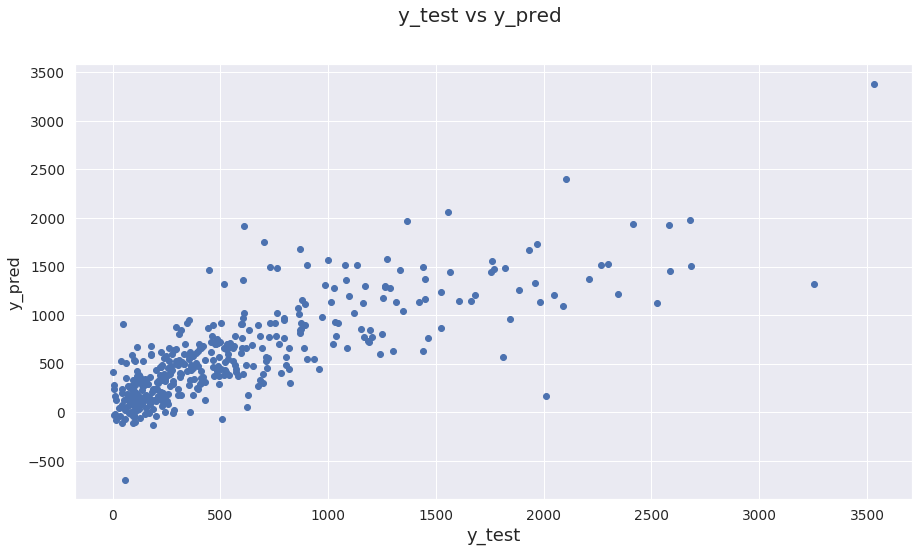

In [58]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [59]:
print("RMSE of test set is {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 score of test set is {}".format(r2_score(y_test, y_pred)))

RMSE of test set is 361.7518865591507
R2 score of test set is 0.6239714374912785


## Selecting columns based on p-value

In [60]:
selected_columns = selected_columns[:-1].values

In [61]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [62]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data_corr.iloc[:,:-1].values,
                                                     data_corr.iloc[:,-1].values, SL, selected_columns)

## Top 23 features are choosen based on the p-value

In [63]:
for index,i in enumerate(selected_columns):
    print(index + 1,' : ',i)

1  :  state
2  :  population
3  :  racepctblack
4  :  agePct12t29
5  :  pctUrban
6  :  pctWWage
7  :  pctWInvInc
8  :  pctWRetire
9  :  OtherPerCap
10  :  PctLess9thGrade
11  :  PctEmploy
12  :  MalePctDivorce
13  :  MalePctNevMarr
14  :  PctWorkMom
15  :  PctKidsBornNeverMar
16  :  PctPersDenseHous
17  :  PctHousOccup
18  :  PctVacantBoarded
19  :  MedYrHousBuilt
20  :  OwnOccLowQuart
21  :  RentQrange
22  :  MedOwnCostPctIncNoMtg
23  :  LemasPctOfficDrugUn


In [64]:
result = pd.DataFrame()
result['ViolentCrimesPerPop'] = data_corr.iloc[:,-1]

In [65]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [66]:
data.head()

,state,population,racepctblack,agePct12t29,pctUrban,pctWWage,pctWInvInc,pctWRetire,OtherPerCap,PctLess9thGrade,PctEmploy,MalePctDivorce,MalePctNevMarr,PctWorkMom,PctKidsBornNeverMar,PctPersDenseHous,PctHousOccup,PctVacantBoarded,MedYrHousBuilt,OwnOccLowQuart,RentQrange,MedOwnCostPctIncNoMtg,LemasPctOfficDrugUn
0,26.0,11980.0,1.37,21.44,100.0,89.24,70.20,18.39,5115.0,5.81,64.55,3.67,26.38,58.88,0.36,0.39,98.37,3.12,1959.0,215900.0,316.0,14.0,0.0
1,33.0,23123.0,0.80,21.30,100.0,78.99,64.11,22.85,5250.0,5.61,61.96,4.23,27.99,62.43,0.24,1.01,97.15,0.00,1958.0,136300.0,205.0,12.5,0.0
2,32.0,29344.0,0.74,25.88,100.0,82.00,55.73,14.56,5954.0,2.80,69.80,10.10,25.78,74.19,0.88,2.03,95.68,0.92,1976.0,74700.0,150.0,11.6,0.0
3,29.0,16656.0,1.70,25.20,0.0,68.15,38.95,18.33,2451.0,11.05,54.74,10.98,28.15,70.27,3.84,1.21,91.19,2.54,1939.0,36400.0,114.0,14.5,0.0
4,21.0,140494.0,2.51,32.89,100.0,75.78,41.15,14.09,7192.0,8.76,59.02,11.40,33.32,70.52,1.58,2.11,91.81,2.09,1966.0,37700.0,134.0,11.7,0.0


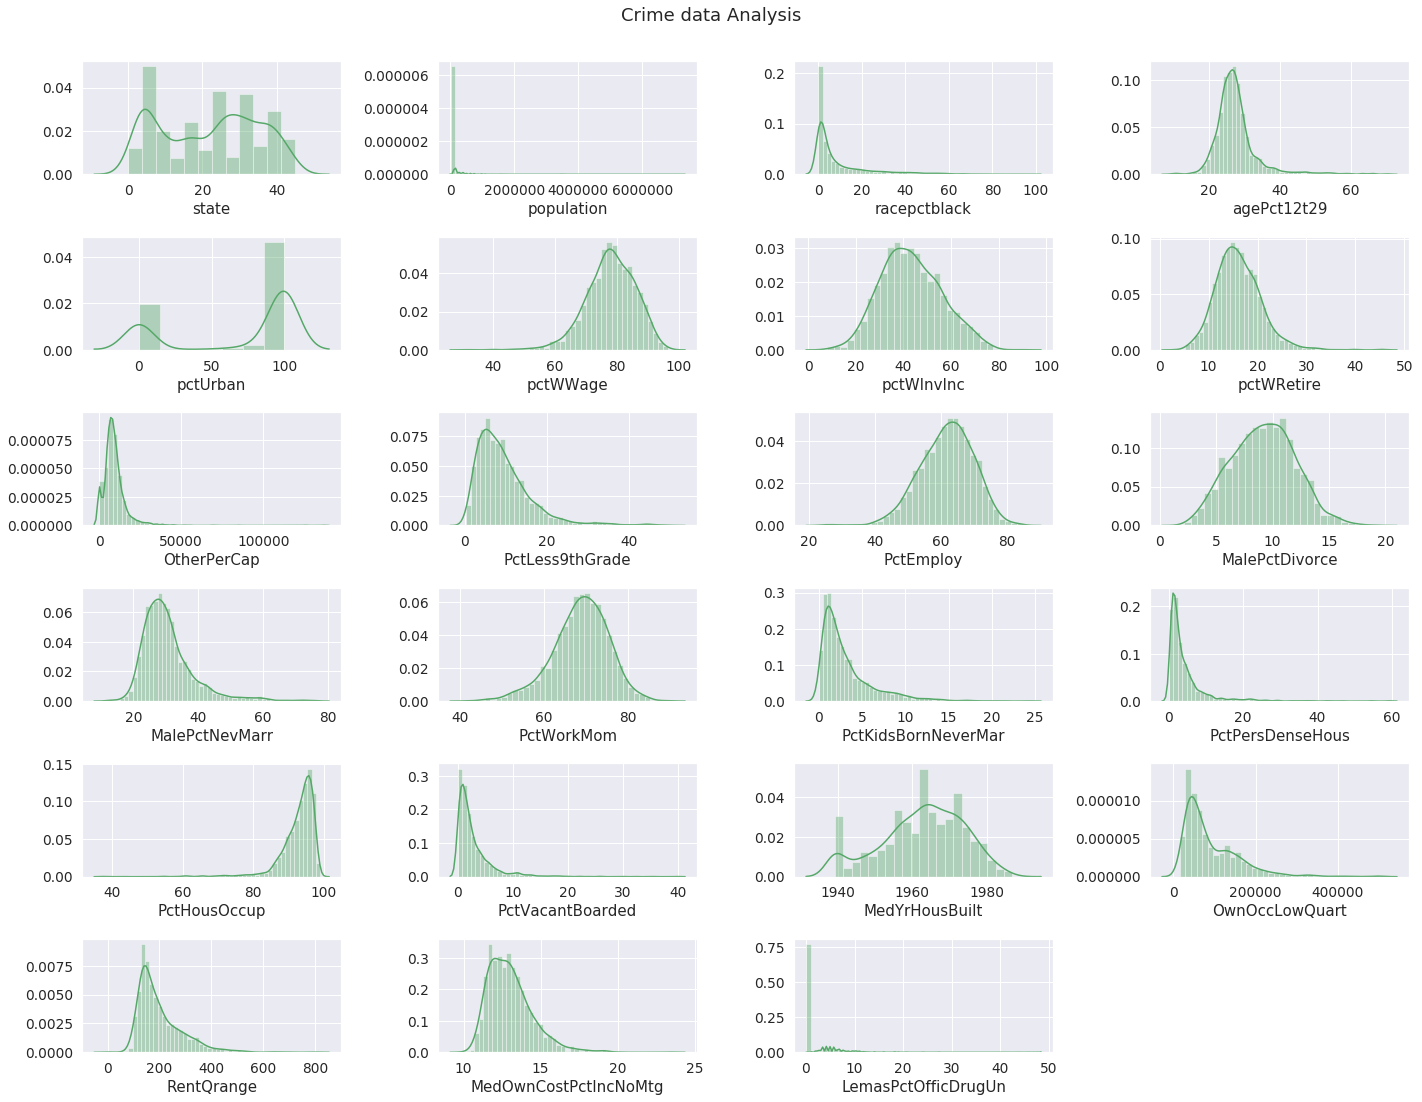

In [67]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(10, 4, j+1)
    j += 1
    sns.distplot(data[i], color='g')
fig.suptitle('Crime data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [68]:
y = result['ViolentCrimesPerPop'].values
X = data

In [69]:
X.shape

(1994, 23)

In [70]:
y.shape

(1994,)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
# .drop('state',axis=1)
numerical_columns = X.columns.tolist()

In [74]:
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [76]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

## P-value for each features and other statistics

In [77]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        03:42:27   Log-Likelihood:                -11658.
No. Observations:                1595   AIC:                         2.336e+04
Df Residuals:                    1571   BIC:                         2.349e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1380.70

In [78]:
# Adding constant variable to test dataframe

X_test_lm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_lm)

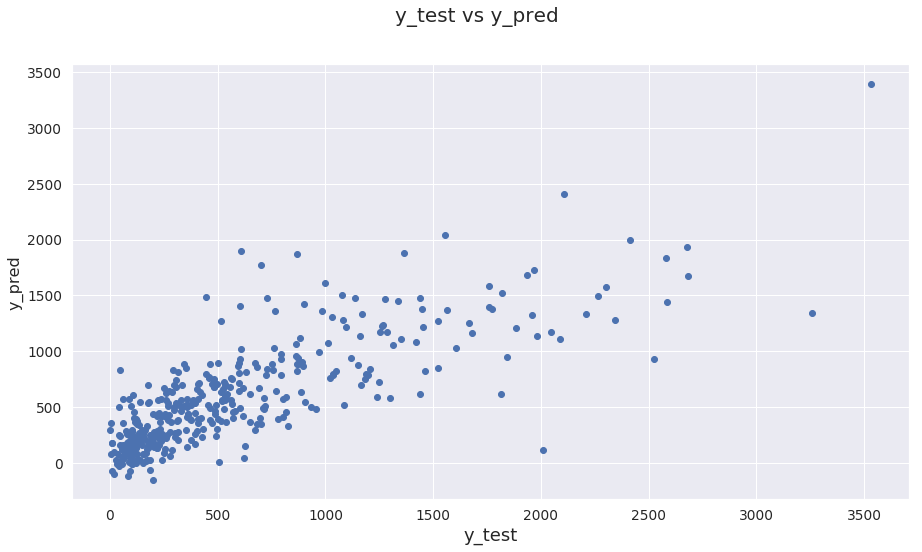

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [80]:
print("RMSE of test set is {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 score of test set is {}".format(r2_score(y_test, y_pred)))

RMSE of test set is 358.0951818976042
R2 score of test set is 0.6315350513840485


## Residual plots

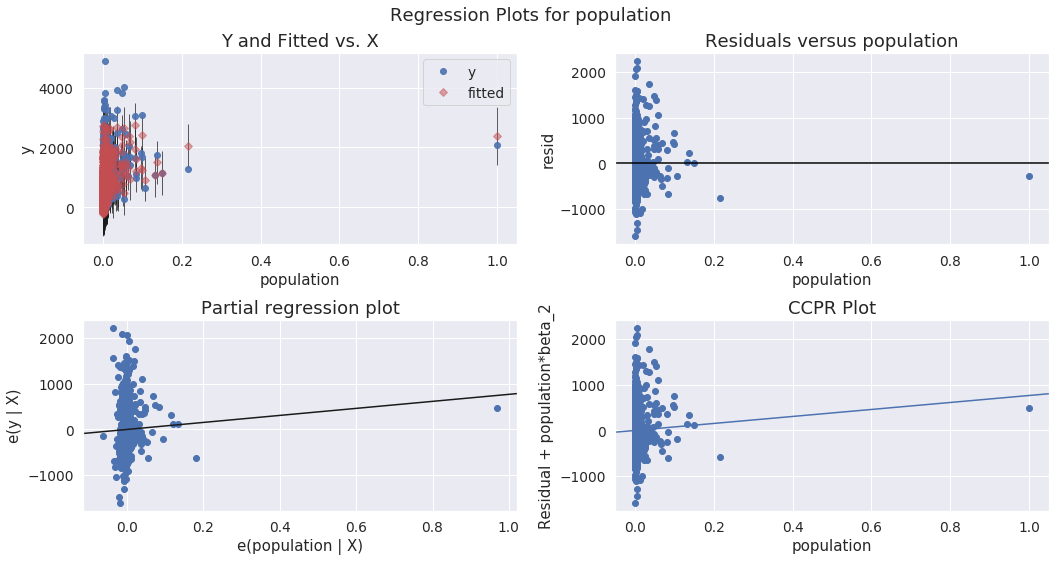

In [81]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(lr, "population", fig=fig)
plt.show()

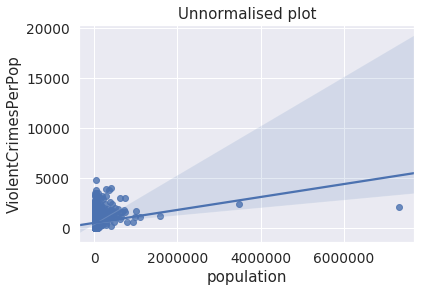

In [82]:
ax = sns.regplot(x="population", y="ViolentCrimesPerPop", data=df)
plt.title('Unnormalised plot')
plt.show()

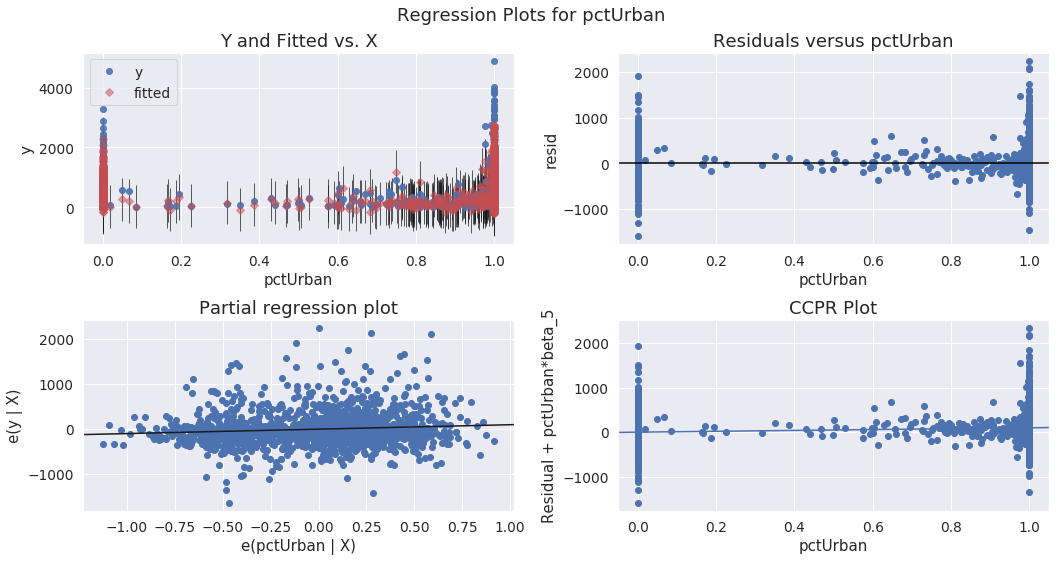

In [83]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lr, "pctUrban", fig=fig)
plt.show()

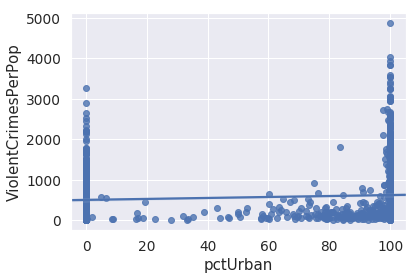

In [84]:
ax = sns.regplot(x="pctUrban", y="ViolentCrimesPerPop", data=df)
plt.show()

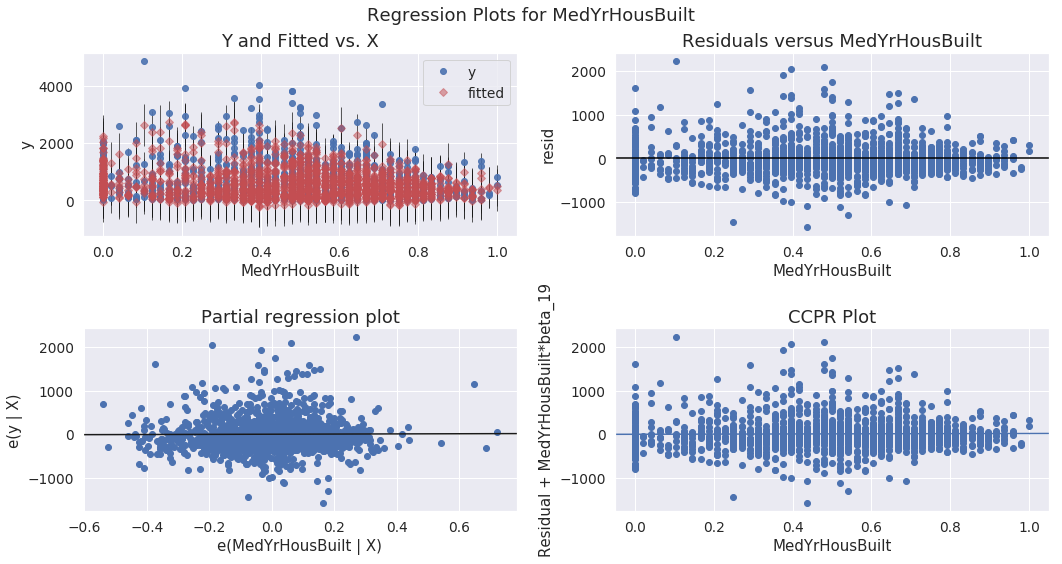

In [85]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lr, "MedYrHousBuilt", fig=fig)
plt.show()

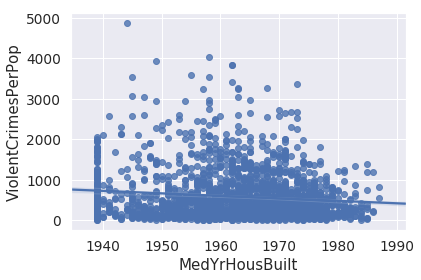

In [86]:
ax = sns.regplot(x="MedYrHousBuilt", y="ViolentCrimesPerPop", data=df)
plt.show()

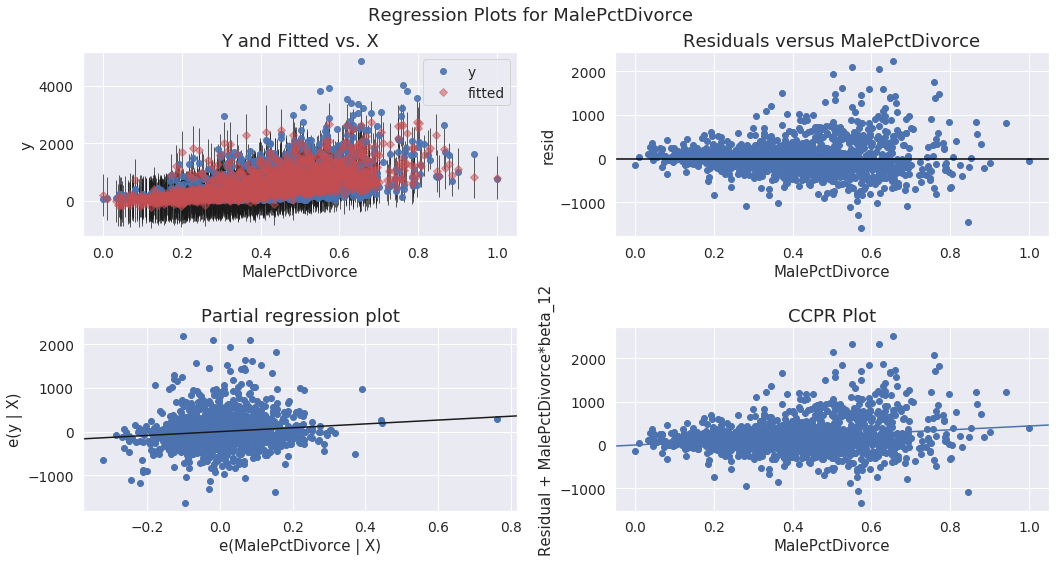

In [87]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lr, "MalePctDivorce", fig=fig)
plt.show()

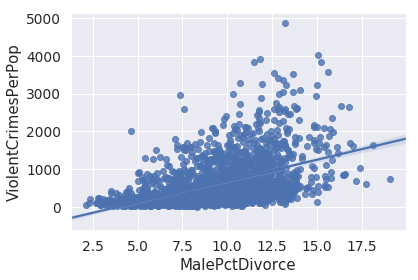

In [88]:
ax = sns.regplot(x="MalePctDivorce", y="ViolentCrimesPerPop", data=df)
plt.show()

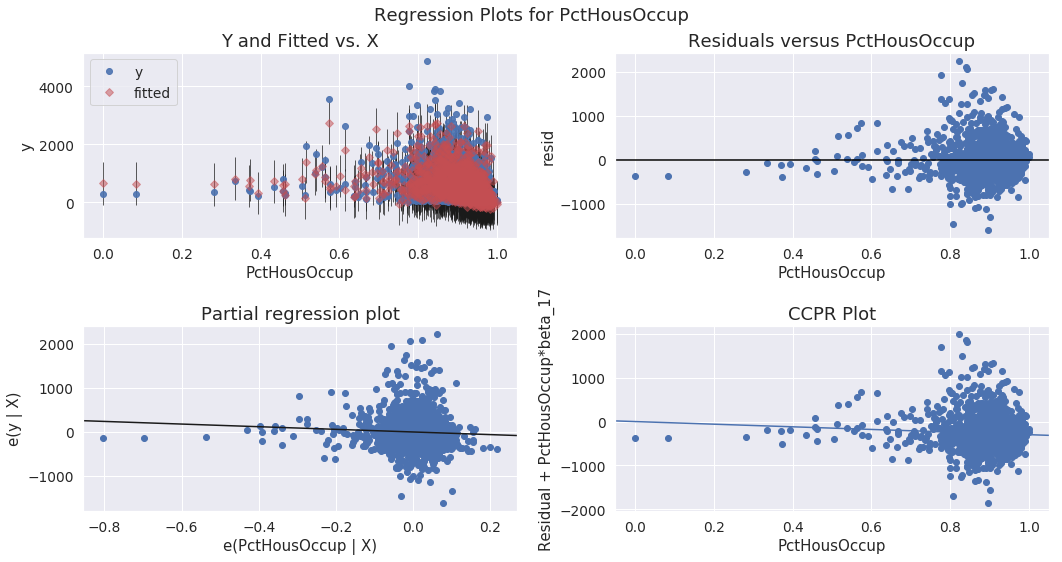

In [89]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lr, "PctHousOccup", fig=fig)
plt.show()

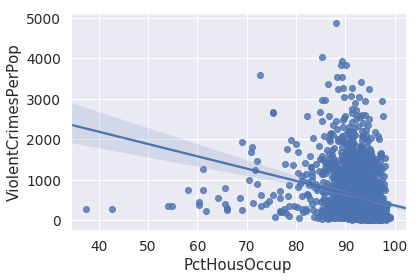

In [90]:
ax = sns.regplot(x="PctHousOccup", y="ViolentCrimesPerPop", data=df)
plt.show()

## Polynomial or Non-linear regression 

In [91]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)


    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [92]:
create_polynomial_regression_model(2)

The model performance for the test set
-------------------------------------------
RMSE of test set is 451.3281482688816
R2 score of test set is 0.4146925315401805


In [93]:
df.head(2)

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,26,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,41.02
1,33,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,127.56


In [94]:
#y = df['ViolentCrimesPerPop']
#X = df.drop(['ViolentCrimesPerPop'],axis=1)

# Milestone - 2

## Applying multiple Linear regression

In [95]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [96]:
X.head()

,state,population,racepctblack,agePct12t29,pctUrban,pctWWage,pctWInvInc,pctWRetire,OtherPerCap,PctLess9thGrade,PctEmploy,MalePctDivorce,MalePctNevMarr,PctWorkMom,PctKidsBornNeverMar,PctPersDenseHous,PctHousOccup,PctVacantBoarded,MedYrHousBuilt,OwnOccLowQuart,RentQrange,MedOwnCostPctIncNoMtg,LemasPctOfficDrugUn
0,0.577778,0.000270,0.014172,0.197284,1.0,0.886357,0.767780,0.355054,0.037336,0.112900,0.663826,0.090802,0.222845,0.357022,0.014882,0.005720,0.989761,0.078215,0.416667,0.413379,0.393524,0.293233,0.0
1,0.733333,0.001794,0.008276,0.194994,1.0,0.728519,0.692715,0.461118,0.038321,0.108875,0.620551,0.123821,0.247899,0.431885,0.009921,0.016151,0.969933,0.000000,0.395833,0.249019,0.255293,0.180451,0.0
2,0.711111,0.002645,0.007655,0.269917,1.0,0.774869,0.589424,0.263971,0.043460,0.052324,0.751546,0.469929,0.213508,0.679882,0.036379,0.033311,0.946043,0.023063,0.770833,0.121825,0.186800,0.112782,0.0
3,0.644444,0.000910,0.017586,0.258793,0.0,0.561595,0.382596,0.353627,0.017891,0.218354,0.499916,0.521816,0.250389,0.597216,0.158743,0.019515,0.873070,0.063675,0.000000,0.042742,0.141968,0.330827,0.0
4,0.466667,0.017845,0.025965,0.384590,1.0,0.679088,0.409713,0.252794,0.052496,0.172268,0.571429,0.546580,0.330843,0.602488,0.065316,0.034657,0.883146,0.052394,0.562500,0.045426,0.166874,0.120301,0.0


In [97]:
X.shape

(1994, 23)

In [98]:
y.shape

(1994,)

### Error in multiple linear Regression

In [100]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse  = np.mean(MSEs)
- mean_mse

138609.24404175996

## 1. Ridge regression with 5-fold cross-validation 

In [101]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

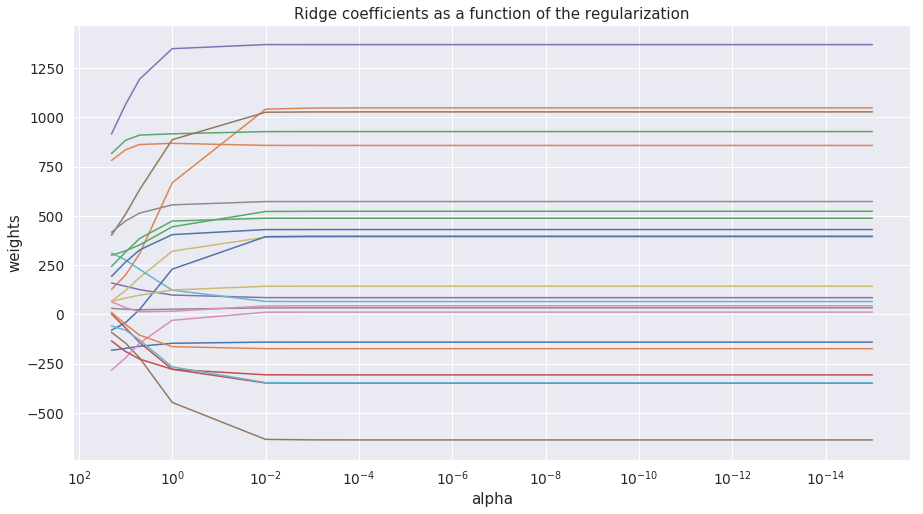

In [102]:
from sklearn import linear_model


# Compute paths

alphas = [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
plt.figure(figsize=(15,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Below we'll run a ridge regression and see how score varies with different alphas. This will show how picking a different alpha score changes the R2.

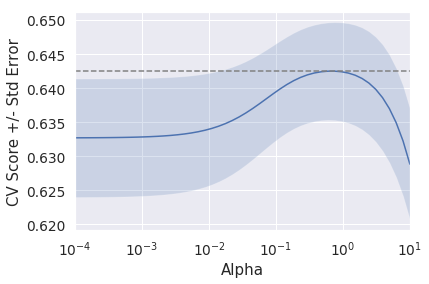

In [118]:
# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 1,50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=False)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

### FInd best params for alpha and MSE score with visualisation also

In [119]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1}
134411.98544085573


### Here best generalised parameter (lambda) is `1`.

In [120]:
ridge = Ridge(alpha=1)

#ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
train_predict = ridge.predict(X)

In [122]:
print('R2-score in Ridge regression : ',r2_score(y,train_predict))

R2-score in Ridge regression :  0.6553421618308648


## 2. Weighted Linear regression

In [123]:
X.shape

(1994, 23)

In [127]:
y.shape

(1994,)

In [128]:
from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

In [129]:
nsample = 1994
w = np.ones(nsample)
w[nsample * 6//10:] = 3

In [130]:
w.shape

(1994,)

In [131]:
mod_wls = sm.WLS(y, X, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            WLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     376.8
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        03:47:30   Log-Likelihood:                -15086.
No. Observations:                1994   AIC:                         3.022e+04
Df Residuals:                    1971   BIC:                         3.035e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                  -102.94

In [132]:
print('R-squared error : 0.815')

R-squared error : 0.815


### Here in this model we are getting r2-score 0.815 . which lot better than Ridge regression.